# Мини-проект к 3 уроку Демо курса "Аналитик данных". 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# задание содержит два датасета. Ссылки на данные записываем в соответствующие переменные
user_data_path = "https://stepik.org/media/attachments/lesson/360348/user_data.csv"
logs_path = 'https://stepik.org/media/attachments/lesson/360348/logs.csv'

In [31]:
# сохраняем данные в соответствующие переменные
user_data = pd.read_csv(user_data_path, sep= ',')
logs = pd.read_csv(logs_path, sep= ',')

## 1. Знакомство с данными

user_data:
* client – идентификатор пользователя
* premium – является ли клиент премиальным
* age – возраст
    
logs:
* client – идентификатор пользователя
* success – результат (успех – 1, нет – 0)
* platform – платформа
* time – время в формате Unix

### 1.1 Обзор датасета user_data

In [39]:
user_data.head() 

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [32]:
user_data.columns

Index(['client', 'premium', 'age'], dtype='object')

In [44]:
user_data.shape # - размер

(2954, 3)

In [47]:
user_data.dtypes # - типы данных столбцов

client     int64
premium     bool
age        int64
dtype: object

In [46]:
user_data.isna().sum() # - проверка количества пустых (NaN) значений

client     0
premium    0
age        0
dtype: int64

### 1.2 Обзор датасета logs

In [50]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [36]:
logs.columns

Index(['client', 'success', 'platform', 'time'], dtype='object')

In [37]:
logs.shape

(4500, 4)

In [38]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [43]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [51]:
logs.platform.nunique() # - кол-во уникальных значений Платформ в logs 

3

## 2. Какой клиент совершил больше всего успешных операций?
Если таких пользователей несколько, перечислите их идентификаторы (client). 
* client – идентификатор пользователя
* success – результат (успех – 1, нет – 0)

In [254]:
# - считаем число успешных операций по каждому клиенту
success_counts = (
    logs 
        .query('success == 1') # - фильтр по успешным операциям
        .client # - только столбец с id клиента
        .value_counts() # - кол-во строк для каждого клиента  
)

success_counts

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [170]:
# - максимальное кол-во успешных операций 
max_success = success_counts.max()
max_success

41

In [176]:
# - фильтр по максимальному кол-ву успешных операций 
max_success_users = (success_counts.loc[success_counts == max_success])
# - в полученном Series id клиента (client) является индексом. 
# - Выбираем только индекс и сортируем по возрастанию
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

## 3. С какой платформы было совершено наибольшее количество успешных операций?

In [173]:
success_counts_platform = (
    logs 
        .query('success == 1') # - фильтр по успешным операциям
        .platform # - только столбец с id клиента
        .value_counts() # - кол-во строк для каждого клиента
)
success_counts_platform

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [174]:
# - .idxmax() - выводит индекс строки с максимальным значением
success_counts_platform.idxmax()

'phone'

## 4. Какая платформа наиболее популярна среди премиумных клиентов?

In [184]:
# - premium - опеределяет Премиальный статус клиента. В датасете - user_data
# - platform - находится в датасете - logs
# - соответственно требуется объединение (.merge) df

In [235]:
merged_users_logs = user_data.merge(logs, on = 'client' )

In [236]:
merged_users_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [238]:
top_platform_for_premium = (
    merged_users_logs
        .loc[merged_users_logs.premium == True]
        .platform
        .value_counts()
        .idxmax()
)

top_platform_for_premium 

'phone'

## 5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [213]:
non_premium_users = user_data.loc[user_data.premium == False]
non_premium_users

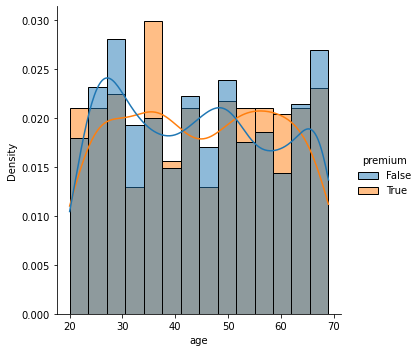

In [241]:
#sns.displot(non_premium_users.age)
sns.displot(
    data = merged_users_logs, 
            x = 'age', 
            hue='premium', 
            kde = True, 
            kind='hist', 
            stat = 'density', 
            common_norm =False,
            bins=14
)

## 6. Постройте график распределения числа успешных операций: 
* x – число успешных операций
* y – число клиентов, совершивших такое количество успешных операций

In [290]:
success_distrib = (logs.loc[logs.success == True]
        .client
        .value_counts()
        .rename('successful')
)
success_distrib

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successful, Length: 2845, dtype: int64

C:\Users\Rf123064\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='successful', ylabel='count'>

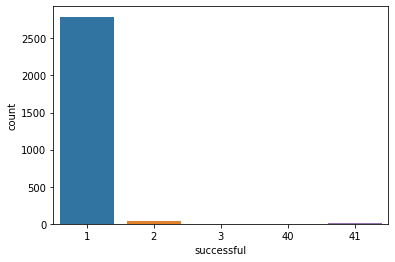

In [305]:
sns.countplot(success_distrib)

In [316]:
age_dist_computer = (
    merged_users_logs
        .loc[logs.success == True]
        .loc[logs.platform == "computer"]
)

C:\Users\Rf123064\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

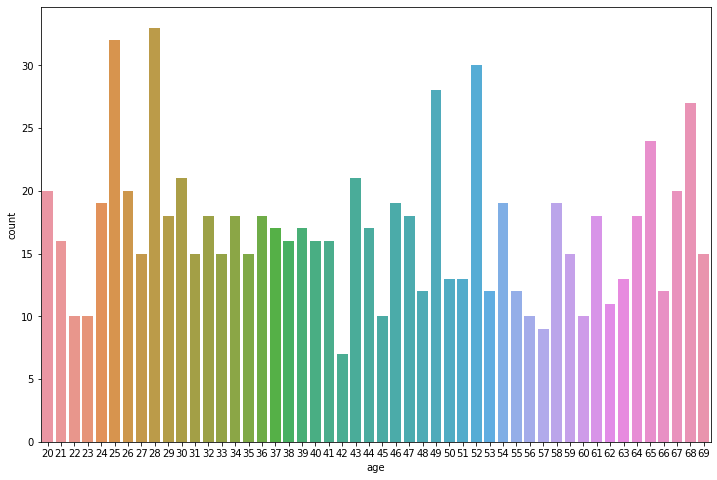

In [317]:
plt.figure(figsize=(12, 8))
sns.countplot(age_dist_computer.age)